1 a)

We know redshift is equal to the wavelength observed minus wavelength emitted divided by the wavelength emitted. $z = (\lambda_o - \lambda_e)/(\lambda_e)$. 
Rearranging: $$z = \lambda_o / \lambda_e -1 $$

For each specific galaxy:
$$z_2 = \frac{\lambda_{o,0}}{\lambda_{e,1}} - 1$$
$$ z_1 = \frac{\lambda_{o,0}}{\lambda_{e,2}} - 1 $$
Where $\lambda_{o,0} = $ wavelength observed by an observer not in galaxy 1 or 2 and $\lambda_{e,n}$ = wavelength emitted by galaxy n.

To get redshift of galaxy 2 in galaxy 1:
$$ z_{2,1}  = \frac{\lambda_{o,1}}{\lambda_{e,2}}-1 $$
Where: $z_{2,1}=$ redshift of galaxy 2 in galaxy 1 and $\lambda_{o,1} = $ wavelength observed by galaxy 1.  
Next, substitute $\lambda_{e,2}$ from $z_2$ into $z_{2,1}$ to get:
$$ z_{2,1} = \frac{\lambda_{o,1}}{\lambda_{o,0}}(z_2+1)-1$$
Since we are finding redshift at galaxy 1, we know $\lambda_{o,1} = \lambda_{e,1}$, the wavelength observed in galaxy 1 is equal to the wavelength emitted in galaxy 1, for a given wavelength. Taking advantage of this equation as well as the above equation for $z_1$, we can substitute and simplify to get:
$$z_{2,1} = \frac{z_2+1}{z_1+1}-1$$

1 b)
Angular diameter distance:
$$ d_a = \frac{r}{1+z} $$
Where r = proper distance, given by the following integral:
$$ r = \int_{0}^{z}\frac{cdz}{H_0\sqrt{\Omega_{m,0}(1+z)^3}} $$


In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const
from scipy import integrate
import matplotlib.pyplot as plt
from IPython.core.debugger import Tracer
%matplotlib inline
Kpc = u.def_unit('Kpc',u.pc*10**3) #define Kpc
Mpc = u.def_unit('Mpc',u.pc*10**6) #define Mpc
Gyr = u.def_unit('Gyr',u.yr*10**9) #define Gyr

#givens
z1 = 0.5
z2 = 1.6
H_0 = 70 *u.km/(u.s * u.Mpc)

#find redshift from above
z21 = ((z2+1)/(z1+1))-1

#now to integrate and get proper distance:
# Omega_m = 1, can ignore, giving:

def prop_int(z): #integrand for finding r
    p =((1+z)**3)**(1/2)
    return p
def prop(z):
    r = integrate.quad(prop_int,0,z)
    return r
r1 = prop(z1)[0]*(const.c/H_0)
r2 = prop(z2)[0]*(const.c/H_0)
r21 = prop(z21)[0]*(const.c/H_0)

angd_01 =(1/(1+z1))*r1 # ang diam from observer to 1
angd_02 =(1/(1+z2))*r2 # ang diam from observer to 2
angd_12 =(1/(1+z21))*r21# ang diam from 1 to 2

print ('Ang. Diam. Distance to galaxy 1:',angd_01.to(u.Mpc))
print ('Ang. Diam. Distance to galaxy 2:',angd_02.to(u.Mpc))
print ('Ang. Diam. Distance to galaxy 2 from galaxy 1:',angd_12.to(u.Mpc))
print ('Redshift of galaxy 2 from galaxy 1: ',z21)

Ang. Diam. Distance to galaxy 1: 2005.0987111965765 Mpc
Ang. Diam. Distance to galaxy 2: 6523.070420030639 Mpc
Ang. Diam. Distance to galaxy 2 from galaxy 1: 2921.034319000819 Mpc
Redshift of galaxy 2 from galaxy 1:  0.7333333333333334


1c) We know that the angular diameter distance increases to a critical value at z_{crit} = 1.6. Therefore, we expect the angular diameter distance to increase until $z=z_{crit}$, which we see from the above calculations, since $z_2 = z_{crit}$ and $d_{a,1}<d_{a,2}$

We also determined that $z_1 < z_{2,1} < z_2$, so we would then guess that $d_{a,z_1}<d_{a,z_{2,1}}<d_{a,z_2}$, which is confirmed by our above calculations.

2)

To calculate mean number density, let N = # of galaxies (1000) and V = volume of sphere with radius = half mass radius:

mean number density = $\frac{AvgGalaxies}{Volume} = \frac{N}{V} $ and
$ V = \frac{4}{3}\pi r^3 $ where r = $R_{hm}=1.5 Mpc$
$$ $$
Giving:
$$ \frac{1000}{\frac{4}{3}\pi r^3} = \frac{1000}{\frac{4}{3}\pi R_{hm}^3} = \frac{1000}{\frac{4}{3}\pi (1.5)^3}=70.73553(\frac{Galaxies}{Mpc^{-3}})$$ 

We use the given cross section of a galaxy to determine average distance traveled for a collision, $\Sigma = 10^{-3}$Mpc$^2$. 


Imagining a cylinder with cross section = $\Sigma$:
$$V = \Sigma l$$
Setting $V N = 1$ to guarantee 1 collision, where N is mean number density calculated above. Solving for *l*
$$ \Sigma l N = 1$$
$$ l = \frac{1}{\Sigma N}$$
giving us:
$$ l = 14.137166 Mpc$$
To calculate average time, need to divide *l* by the velocity dispersion($\sigma$)= 880$\frac{km}{s}$:
$$ t_{avg} = \frac{l}{\sigma} $$
$$ t_{avg} = 15.7082 Gyrs $$

This gives us $t_{avg}$*>Hubble Time* = 14 Gyrs


Comparing to the collision time for Milky Way and Andromeda:

Let *r* = separation between Milky Way and Andromeda = 700 kpc

Let *v* = velocity of Andromeda towards Milky Way = 120 $\frac{km}{s}$

Giving:
$$ t = \frac{r}{v} = \frac{700}{120}\frac{kpc*s}{km} = 5.7 Gyrs$$

More detailed calculations in the code below:


In [2]:
N = 1000
Rhm = 1.5 * u.Mpc
r = Rhm 
V = (4/3)*np.pi*r**3
mnd = N/V
print ("Mean Number Density = ",mnd)
sigma = 10**(-3)*(u.Mpc)**2
n = mnd
l = 1/(sigma*n)
print ('length per collision = ',l.to(u.Mpc))
v_disp = 880 *(u.km/u.s)
t_avg = l/v_disp
print ('averge time between collisions = ',t_avg.to(u.Gyr))
v_and = 120 * (u.km/u.s)
r_and = 0.7 * u.Mpc
t_and = r_and/v_and
print('Time until MW-Andromeda collision = ',t_and.to(u.Gyr))

Mean Number Density =  70.7355302630646 1 / Mpc3
length per collision =  14.137166941154067 Mpc
averge time between collisions =  15.708195308585159 Gyr
Time until MW-Andromeda collision =  5.703787959759915 Gyr


In [ ]:
# cosmology lens model
# lens model (Mass,Dd, Ds, Dss)--> einstein radius (arcseconds) (500px x 500px)
# define deflection angles
# beta = theta - theta_e**2 / theta
# theta is angle of pixel away from center of image --> distance from lens to where you observe object (angular distance to a pixel)
# can calculate theta for any pixel
# gives beta 
# convert beta into image and transfer flux value from original to where beta is. 
#  make sure width 
# image = np.zero(500,500)


In [170]:
image = plt.imread('gal.jpg')
theta = np.ndarray(shape=(image.shape))
alpha = np.ndarray(shape=(image.shape[0],image.shape[1]))
# F.o.V = 3.1 x 3.1 arcmins
# 3.1 arcmin / image.shape[0] = ang dist. of 1 pixel. 
pix_ang_dist = 5.54 * u.arcmin / (image.shape[1])
pix_ang_dist = pix_ang_dist.to(u.arcsec)



# need to define middle, position of lens:
lens_pos = np.array([int(image.shape[0]/2),int(image.shape[1]/2)])
# define beta for each pixel
# define theta_e
M = 10**14* const.M_sun
x = 0.5 # distance to lens rel to distance to source
d = 50000 * u.pc # distance to source


theta_e = ((4 * const.G * M * (1-x))/(const.c**2 * d * x))**(1/2)
theta_e = theta_e.decompose()
theta_e = theta_e * u.rad
theta_e = theta_e.to(u.arcsec)
# theta_e = 12764 arcsec

beta_boundary = 100 * u.arcsec 
#beta_image = np.ndarray(shape=image.shape)
beta_image = image
for (y,x,z),val in np.ndenumerate(image):
    val = image[y][x][z]
    x_rlens = x - lens_pos[1] #pixels
    y_rlens = y - lens_pos[0] #pixels
    beta = np.sqrt(x_rlens**2 + y_rlens**2) # ang dist from center
    beta = beta * pix_ang_dist # converts pixel distances to arcsecs
    if beta <= beta_boundary:
        theta_p = (1/2)*(beta + np.sqrt(beta**2 + 4*theta_e**2)) # arcsec
        theta_n = (1/2)*(beta - np.sqrt(beta**2 + 4*theta_e**2)) # arcsec
        mag_n = (1-(theta_e**4)/(theta_n**4))**(-1) # dimensionless
        mag_p = (1-(theta_e**4)/(theta_p**4))**(-1) # dimensionless
        new_val_n = mag_n * val # some val corresponding to flux/lum
        new_val_n = float(new_val_n)
        new_val_p = mag_p * val # some val corresponding to flux/lum
        new_val_p = float(new_val_p)
        theta_n = theta_n / pix_ang_dist # converts theta_n to pixels
        theta_p = theta_p / pix_ang_dist # converts theta_p to pixels
        beta = beta / pix_ang_dist # converts beta to pixels
        if beta == 0:
            beta = 0.01 # removes divide by 0 error
        x_new_n = (x_rlens/beta)*theta_n # rel to lens
        x_new_n = x_new_n + lens_pos[1] # rel to top left (correct indices)
        x_new_p = (x_rlens/beta)*theta_p # rel to lens
        x_new_p = x_new_p + lens_pos[1] # rel to top left (correct indices)
        y_new_n = (y_rlens/beta)*theta_n # rel to lens
        y_new_n = y_new_n + lens_pos[0] # rel to top left (correct indices)
        y_new_p = (y_rlens/beta)*theta_p # rel to lens
        y_new_p = y_new_p + lens_pos[0] # rel to top left (correct indices)
        x_new_n = int(x_new_n)
        x_new_p = int(x_new_p)
        y_new_p = int(y_new_p)
        y_new_n = int(y_new_n)
        if x_new_n <= image.shape[1] and x_new_p <= image.shape[1] and y_new_n <= image.shape[0] and y_new_p <= image.shape[0]:
            beta_image[y_new_n][x_new_n][z] = new_val_n
            beta_image[y_new_p][x_new_p][z] = new_val_p
        else:
            beta_image[y][x][z] = val #this might overwrite the above lensing changes made for some pixels. 
    


KeyboardInterrupt: 

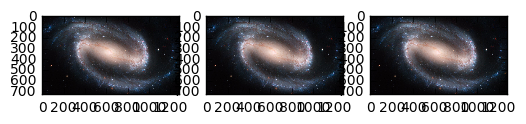

In [162]:
inv_beta_image = beta_image
fig,ax = plt.subplots(1,3)
ax[0].imshow(image)
ax[1].imshow(inv_beta_image)
ax[2].imshow(beta_image)

In [168]:
number = -1
float(number)

-1.0

In [ ]:
image = plt.imread('hudf_smallest.jpg')
theta = np.ndarray(shape=(image.shape[0],image.shape[1]))
alpha = np.ndarray(shape=(image.shape[0],image.shape[1]))
# F.o.V = 3.1 x 3.1 arcmins
# 3.1 arcmin / image.shape[0] = ang dist. of 1 pixel. 
pix_ang_dist = 3.1 * u.arcmin / (image.shape[0])




# need to define middle, position of lens:
lens_pos = np.array([image.shape[0]/2,image.shape[1]/2])
# define beta for each pixel
M = 100*const.M_sun

for (x,y,z),val in np.ndenumerate(image):
    x_rlens = x - lens_pos[0]
    y_rlens = y - lens_pos[1]
    theta[x][y] = np.sqrt(x_rlens**2 + y_rlens**2)

for (x,y),val in np.ndenumerate(theta):
    a = ((4 * const.G * M)/(const.c**2 * val*pix_ang_dist))
    Tracer()()
    a = a.value
    alpha[x][y] = a
    
alpha

In [53]:
testarray = np.ndarray(shape=(4,2,2))
testarray

    

array([[[ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.]]])